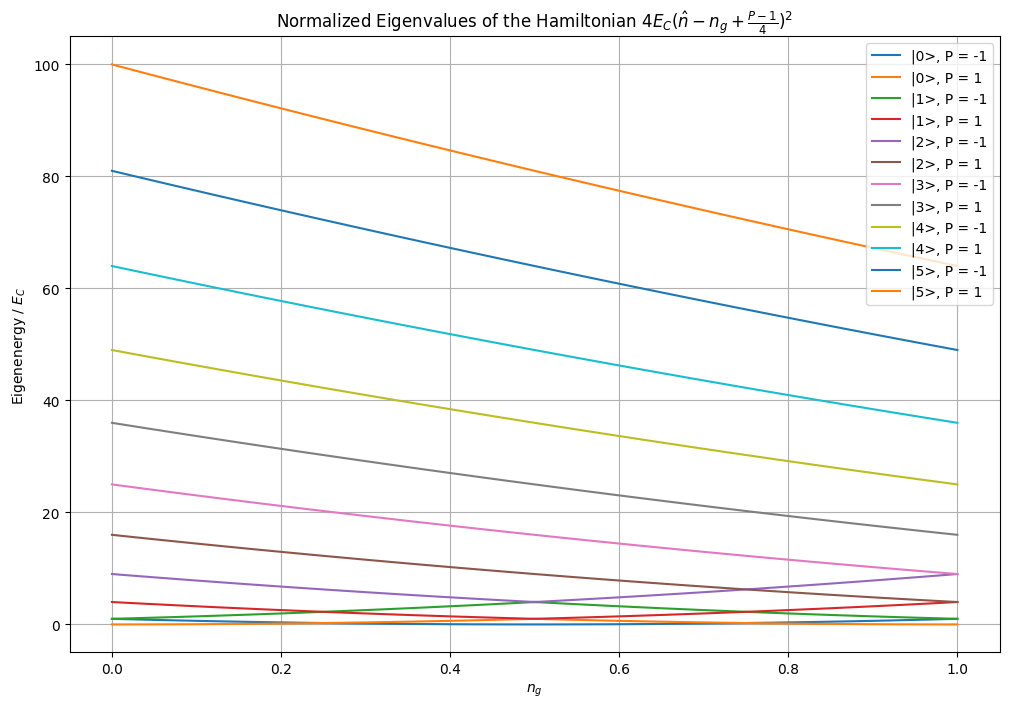

In [12]:
from qutip import basis, qzero
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters value
EC = 0.356 * 1e9 * h  # in Joules

# Define the number of states (N+1 states, from 0 to N)
N = 5  # Number of states for simplicity

# Create basis states |n> for n = 0 to N
basis_states = [basis(N+1, n) for n in range(N+1)]

# Initialize the \hat{n} operator as a zero matrix of size (N+1)x(N+1)
n_operator = qzero(N+1)

# Construct the \hat{n} operator
for n in range(N+1):
    n_operator += n * basis_states[n] * basis_states[n].dag()

# Function to construct the Hamiltonian for a given charge parity P and n_g
def construct_H_EC(P, n_g):
    return 4 * EC * (n_operator - n_g + (P - 1) / 4)**2

# Range of n_g values
n_g_values = np.linspace(0, 1, 100)

# Calculate eigenvalues for P = -1 and P = 1
P_values = [-1, 1]
eigenvalues_dict = {P: [] for P in P_values}

for n_g in n_g_values:
    for P in P_values:
        H_EC = construct_H_EC(P, n_g)
        eigenvalues = H_EC.eigenenergies()
        eigenvalues_normalized = eigenvalues / EC
        eigenvalues_dict[P].append(eigenvalues_normalized)

# Convert lists to arrays for easier plotting
for P in P_values:
    eigenvalues_dict[P] = np.array(eigenvalues_dict[P])

# Plot the eigenvalues for P = -1 and P = 1
plt.figure(figsize=(12, 8))
for i in range(N+1):
    for P in P_values:
        plt.plot(n_g_values, eigenvalues_dict[P][:, i], label=f'|{i}>, P = {P}')

plt.xlabel('$n_g$')
plt.ylabel('Eigenenergy / $E_C$')
plt.title('Normalized Eigenvalues of the Hamiltonian $4E_C(\\hat{n} - n_g + \\frac{P-1}{4})^2$')
plt.legend()
plt.grid(True)
plt.show()


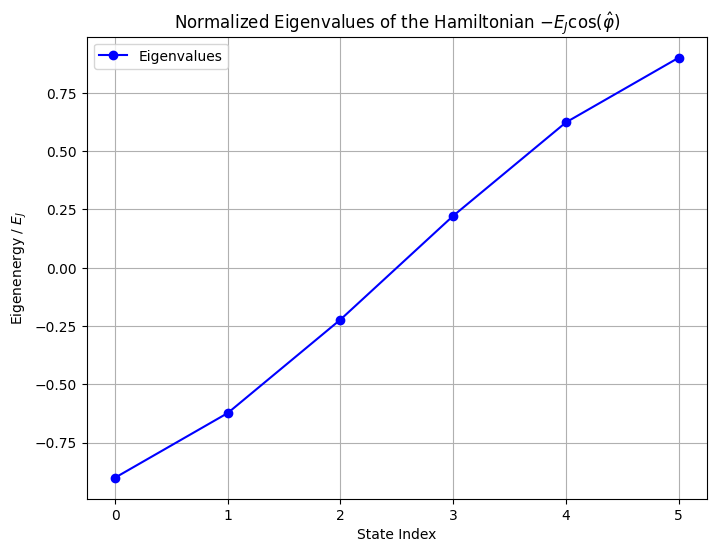

In [7]:
from qutip import basis, qzero
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters value
EJ = 6.14 * 1e9 * h  # in Joules

# Define the number of states (N+1 states, from 0 to N)
N = 5  # Number of states for simplicity

# Create basis states |n> for n = 0 to N
basis_states = [basis(N+1, n) for n in range(N+1)]

# Initialize the shift operators
e_iphi = qzero(N + 1)
e_imphi = qzero(N + 1)

# Construct the shift operator e^{i \hat{\varphi}}
for n in range(N):
    e_iphi += basis(N + 1, n + 1) * basis(N + 1, n).dag()

# Construct the shift operator e^{-i \hat{\varphi}}
for n in range(1, N + 1):
    e_imphi += basis(N + 1, n - 1) * basis(N + 1, n).dag()

# Construct cos(\hat{\varphi})
cos_phi = 0.5 * (e_iphi + e_imphi)

# Construct the Hamiltonian for EJ term
H_EJ = -EJ * cos_phi

# Solve the eigenvalues and eigenstates of H_EJ
eigenvalues, eigenstates = H_EJ.eigenstates()

# Normalize eigenvalues by EJ
eigenvalues_normalized = eigenvalues / EJ

# Plot the eigenvalues
plt.figure(figsize=(8, 6))
plt.plot(range(N+1), eigenvalues_normalized, 'bo-', label='Eigenvalues')
plt.xlabel('State Index')
plt.ylabel('Eigenenergy / $E_J$')
plt.title('Normalized Eigenvalues of the Hamiltonian $-E_J \\cos(\\hat{\\varphi})$')
plt.legend()
plt.grid(True)
plt.show()


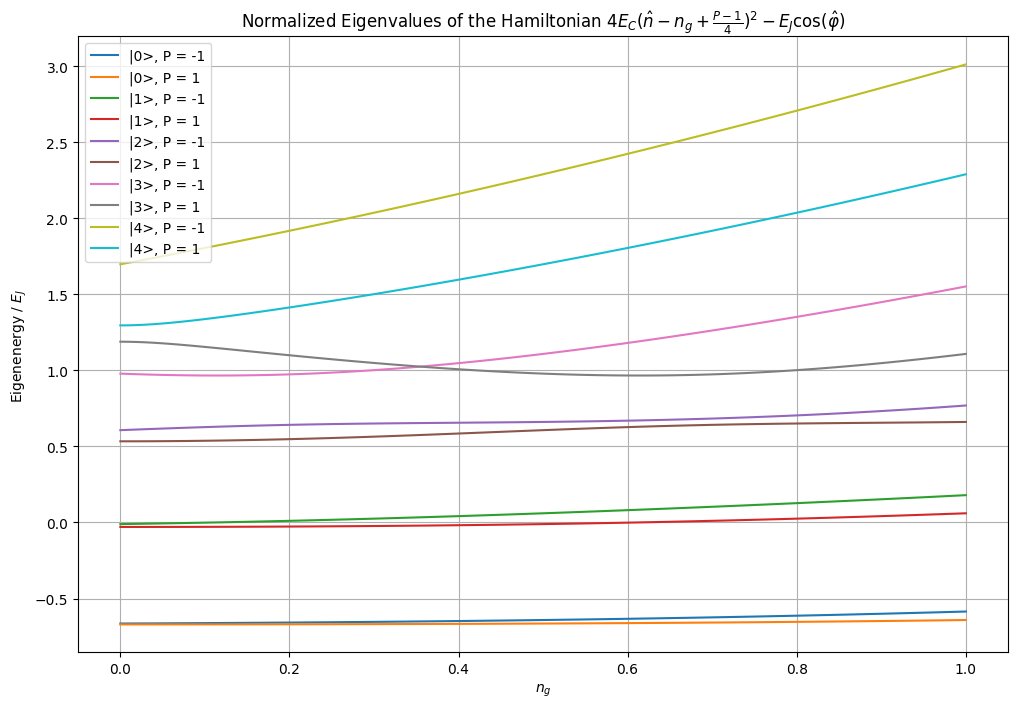

In [16]:
from qutip import basis, qzero, destroy
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h, hbar, giga

# Define the parameters value
EJ = 6.14 * giga * h  # in Joules
EC = 0.356 * giga * h  # in Joules

# Define the number of states (N+1 states, from 0 to N)
N = 4  # Increase the number of states for better accuracy

# Create basis states |n> for n = 0 to N
basis_states = [basis(N+1, n) for n in range(N+1)]

# Initialize the \hat{n} operator as a zero matrix of size (N+1)x(N+1)
n_operator = qzero(N+1)

# Construct the \hat{n} operator
for n in range(N+1):
    n_operator += (n - (N // 2)) * basis_states[n] * basis_states[n].dag()  # Shift n values for symmetry

# Initialize the shift operators
e_iphi = qzero(N + 1)
e_imphi = qzero(N + 1)

# Construct the shift operator e^{i \hat{\varphi}}
for n in range(N):
    e_iphi += basis(N + 1, n + 1) * basis(N + 1, n).dag()

# Construct the shift operator e^{-i \hat{\varphi}}
for n in range(1, N + 1):
    e_imphi += basis(N + 1, n - 1) * basis(N + 1, n).dag()

# Construct cos(\hat{\varphi})
cos_phi = 0.5 * (e_iphi + e_imphi)

# Function to construct the full Hamiltonian for given charge parity P and n_g
def construct_H_CPB(P, n_g):
    H_EC = 4 * EC * (n_operator - n_g + (P - 1) / 4)**2
    H_EJ = -EJ * cos_phi
    return H_EC + H_EJ

# Range of n_g values
n_g_values = np.linspace(0, 1, 100)

# Calculate eigenvalues for P = -1 and P = 1
P_values = [-1, 1]
eigenvalues_dict = {P: [] for P in P_values}

for n_g in n_g_values:
    for P in P_values:
        H_CPB = construct_H_CPB(P, n_g)
        eigenvalues = H_CPB.eigenenergies()
        eigenvalues_normalized = eigenvalues / EJ
        eigenvalues_dict[P].append(eigenvalues_normalized)

# Convert lists to arrays for easier plotting
for P in P_values:
    eigenvalues_dict[P] = np.array(eigenvalues_dict[P])

# Plot the eigenvalues for P = -1 and P = 1
plt.figure(figsize=(12, 8))
for i in range(N+1):
    for P in P_values:
        plt.plot(n_g_values, eigenvalues_dict[P][:, i], label=f'|{i}>, P = {P}')

plt.xlabel('$n_g$')
plt.ylabel('Eigenenergy / $E_J$')
plt.title('Normalized Eigenvalues of the Hamiltonian $4E_C(\\hat{n} - n_g + \\frac{P-1}{4})^2 - E_J \\cos(\\hat{\\varphi})$')
plt.legend()
plt.grid(True)
plt.show()


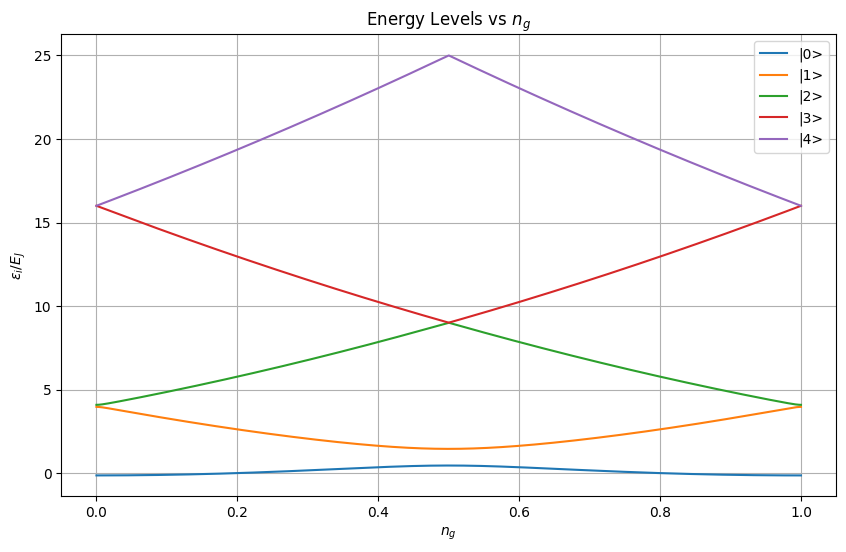

In [20]:
# Increasing the precision of the calculations by using more points in the Hamiltonian matrix
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Constants
E_C = 1.0  # Charging energy
E_J = 1.0  # Josephson energy
ng_values = np.linspace(0, 1, 10000)  # Gate charge values with more points

# Hamiltonian matrix construction
def hamiltonian(n_max, ng, E_C, E_J):
    n = np.arange(-n_max, n_max+1)
    H = np.diag(4 * E_C * (n - ng)**2) - 0.5 * E_J * (np.diag(np.ones(2*n_max), 1) + np.diag(np.ones(2*n_max), -1))
    return H

# Parameters
n_max = 20  # Increased truncation in number space for higher precision
energies = np.zeros((len(ng_values), 2*n_max+1))

# Compute eigenenergies for each gate charge value
for i, ng in enumerate(ng_values):
    H = hamiltonian(n_max, ng, E_C, E_J)
    eigvals, _ = eigh(H)
    energies[i, :] = eigvals

# Plotting the energy levels
plt.figure(figsize=(10, 6))
for i in range(5):  # Plot the first 5 energy levels
    plt.plot(ng_values, energies[:, i] / E_J, label=f'|{i}>')
plt.xlabel('$n_g$')
plt.ylabel('$\epsilon_{i} / E_J$')
plt.legend(loc='upper right')
plt.title('Energy Levels vs $n_g$')
plt.grid(True)
plt.show()
